#Heart Attack Predictor

In [1]:
import pandas
import numpy as np

In [2]:
df=pandas.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

##Data Visualization

####Understanding correlation of the data using the **heatmap**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

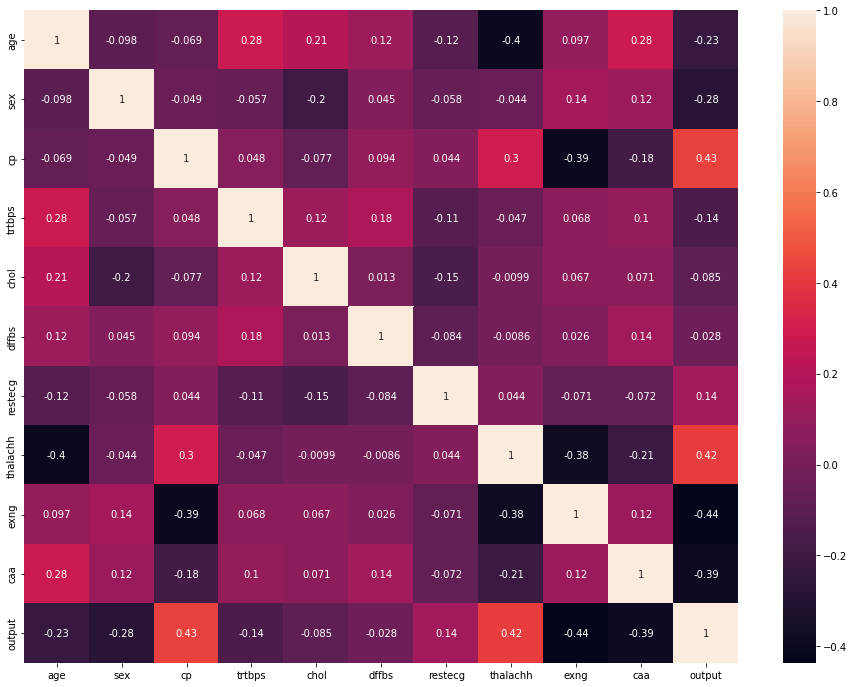

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

###Analyzing the chest pain trends

In [8]:
chestpain=df['cp'].value_counts().reset_index()
chestpain['index'][3]='asymptotic'
chestpain['index'][2]='non-anginal'
chestpain['index'][1]='Atypical anigma'
chestpain['index'][0]='Typical anigma'
chestpain

,index,cp
0,Typical anigma,143
1,Atypical anigma,87
2,non-anginal,50
3,asymptotic,23


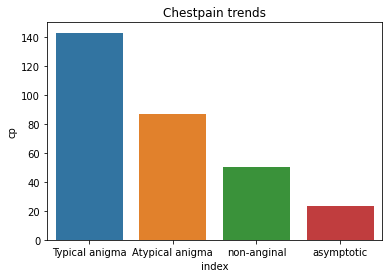

In [9]:
plt.title('Chestpain trends')
sns.barplot(x=chestpain['index'], y=chestpain['cp'])

###Analyzing ECG trends

In [10]:
ecg=df['restecg'].value_counts().reset_index()
ecg['index'][0]='normal'
ecg['index'][1]='abnormal ST-T wave'
ecg['index'][2]='probable or definite left ventricular hypertrophy'
ecg

,index,restecg
0,normal,152
1,abnormal ST-T wave,147
2,probable or definite left ventricular hypertrophy,4


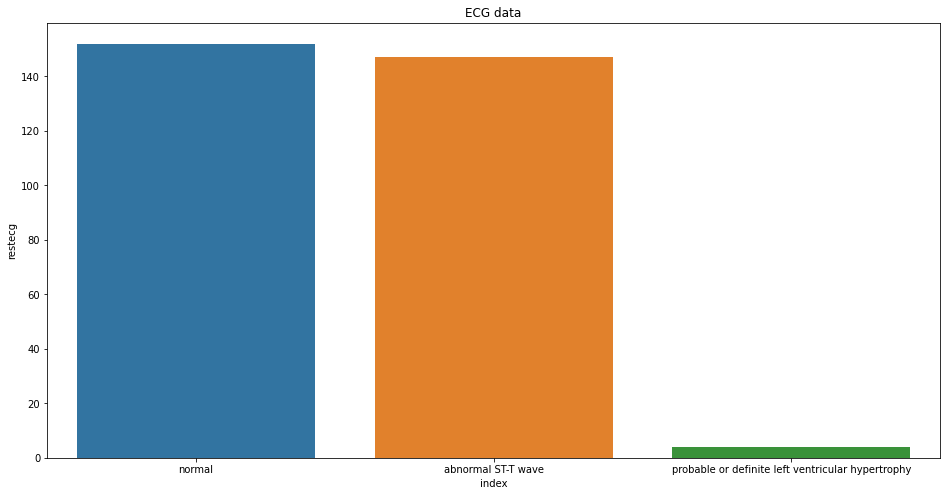

In [11]:
plt.figure(figsize=(16,8))
plt.title('ECG data')
sns.barplot(x=ecg['index'], y=ecg['restecg'])

###Analyzing the heart attack possibility with age


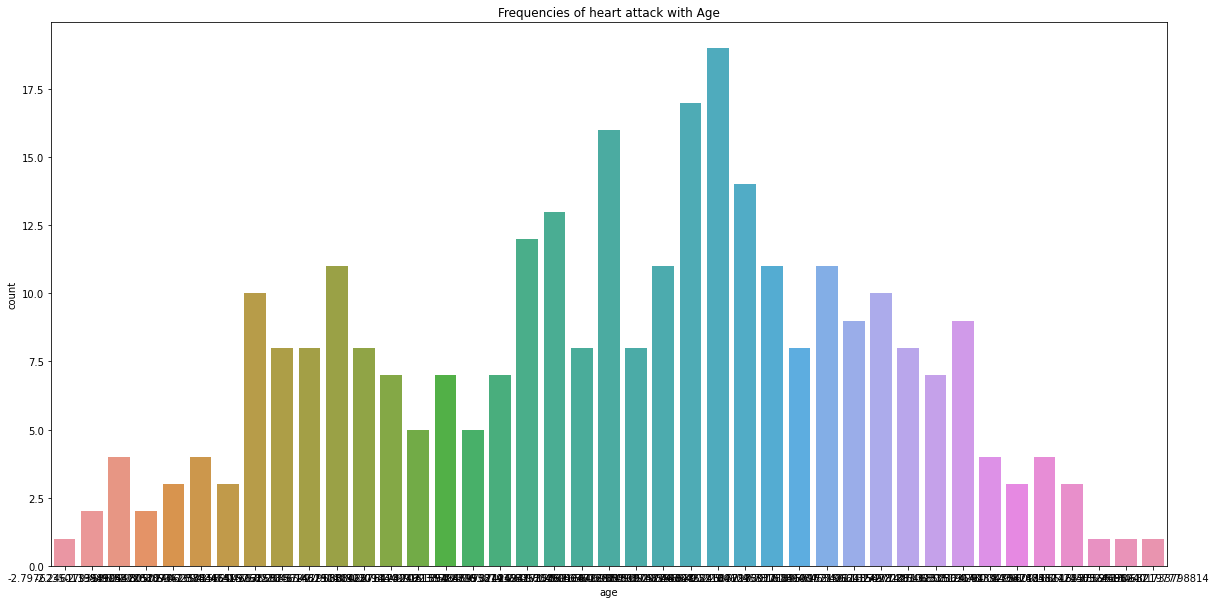

In [45]:
plt.figure(figsize=(20,10))
plt.title('Frequencies of heart attack with Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.countplot(x="age", data=df)

#Machine Learning

###In this project we try to understand whether the adaboost model performs better than generally used models

###Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
df=scaler.transform(df)

In [14]:
df=pandas.DataFrame(df, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'dffbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'])

In [15]:
df.drop(['oldpeak', 'slp', 'thall'], axis=1, inplace=True)

In [16]:
df.head()

,age,sex,cp,trtbps,chol,dffbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

###Splitting Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=40)


###Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [20]:
label=LabelEncoder()
y_train_encoded=label.fit_transform(y_train)
y_test_encoded=label.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
regressor_lr=LogisticRegression()
regressor_lr.fit(X_train,y_train_encoded)

LogisticRegression()

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
y_train_pred_lr=regressor_lr.predict(X_train)
print(confusion_matrix(y_train_encoded, y_train_pred_lr))
print("Accuracy_Score: ", accuracy_score(y_train_encoded, y_train_pred_lr))

[[71 27]
 [18 96]]
Accuracy_Score:  0.7877358490566038


In [24]:
y_test_pred_lr = regressor_lr.predict(X_test)
print(confusion_matrix(y_test_encoded, y_test_pred_lr))
print("Accuracy_Score: ", accuracy_score(y_test_encoded, y_test_pred_lr))

[[33  7]
 [ 6 45]]
Accuracy_Score:  0.8571428571428571


###Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train, y_train_encoded)

RandomForestClassifier()

In [ ]:
y_train_pred_rf=classifier_rf.predict(X_train)
print(confusion_matrix(y_train_encoded, y_train_pred_rf))
print("Accuracy_Score: ", accuracy_score(y_train_encoded, y_train_pred_rf))

[[ 98   0]
 [  0 114]]
Accuracy_Score:  1.0


In [ ]:
y_test_pred_rf=classifier_rf.predict(X_test)
print(confusion_matrix(y_test_encoded, y_test_pred_rf))
print("Accuracy_Score: ", accuracy_score(y_test_encoded, y_test_pred_rf))

[[36  4]
 [ 6 45]]
Accuracy_Score:  0.8901098901098901


###Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train_encoded)

SVC()

In [ ]:
y_train_pred_svm=svm.predict(X_train)
print(confusion_matrix(y_train_encoded, y_train_pred_svm))
print("Accuracy_Score: ", accuracy_score(y_train_encoded, y_train_pred_svm))

[[ 79  19]
 [  7 107]]
Accuracy_Score:  0.8773584905660378


In [ ]:
y_test_pred_svm=svm.predict(X_test)
print(confusion_matrix(y_test_encoded, y_test_pred_svm))
print("Accuracy_Score: ", accuracy_score(y_test_encoded, y_test_pred_svm))

[[31  9]
 [ 4 47]]
Accuracy_Score:  0.8571428571428571


###Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(X_train,y_train_encoded)

DecisionTreeClassifier()

In [26]:
y_train_pred_dt=classifier_dt.predict(X_train)
print(confusion_matrix(y_train_encoded, y_train_pred_dt))
print("Accuracy_Score: ", accuracy_score(y_train_encoded, y_train_pred_dt))

[[ 98   0]
 [  0 114]]
Accuracy_Score:  1.0


In [27]:
y_test_pred_dt=classifier_dt.predict(X_test)
print(confusion_matrix(y_test_encoded, y_test_pred_dt))
print("Accuracy_Score: ", accuracy_score(y_test_encoded, y_test_pred_dt))

[[31  9]
 [16 35]]
Accuracy_Score:  0.7252747252747253


###K-Nearest Neighbors Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier


In [32]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier(n_neighbors=10)

In [33]:
y_train_pred_knn=knn.predict(X_train)
print(confusion_matrix(y_train_encoded, y_train_pred_knn))
print("Accuracy_Score: ", accuracy_score(y_train_encoded, y_train_pred_knn))

[[80 18]
 [22 92]]
Accuracy_Score:  0.8113207547169812


In [34]:
y_test_pred_knn=knn.predict(X_test)
print(confusion_matrix(y_test_encoded, y_test_pred_knn))
print("Accuracy_Score: ", accuracy_score(y_test_encoded, y_test_pred_knn))

[[35  5]
 [ 8 43]]
Accuracy_Score:  0.8571428571428571


###Dataframe of all the model accuracies

In [38]:
model_accuracies=pandas.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], 'Accuracy': [0.8571428571428571, 0.7252747252747253, 0.8681318681318682, 0.8571428571428571, 0.8571428571428571] })


In [39]:
model_accuracies.sort_values('Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.868132
0,Logistic Regression,0.857143
3,KNN,0.857143
4,SVM,0.857143
1,Decision Tree,0.725275


###Adaboost Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
classifier_adab=AdaBoostClassifier(base_estimator=svm, n_estimators=100, algorithm='SAMME',
                                   learning_rate=0.01, random_state=0)
classifier_adab.fit(X_train, y_train_encoded)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [41]:
y_train_pred_adab=classifier_adab.predict(X_train)
print(confusion_matrix(y_train_encoded, y_train_pred_adab))
print("Accuracy_Score: ", accuracy_score(y_train_encoded, y_train_pred_adab))

[[  0  98]
 [  0 114]]
Accuracy_Score:  0.5377358490566038


In [42]:
y_test_pred_adab=classifier_adab.predict(X_test)
print(confusion_matrix(y_test_encoded, y_test_pred_adab))
print("Accuracy_Score: ", accuracy_score(y_test_encoded, y_test_pred_adab))

[[ 0 40]
 [ 0 51]]
Accuracy_Score:  0.5604395604395604


###AdaBoostClassifier does not perform well compared to other classifiers.